<a href="https://colab.research.google.com/github/MKangabire/student_dropout/blob/main/student_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install tensorflow

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2, l1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


ImportError: Traceback (most recent call last):
  File "C:\Users\Merveille\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [77]:
df = pd.read_csv('../dataset/student dropout.csv')

In [79]:
df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,False


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [83]:
columns_to_keep = [
    'Dropped_Out', 'Mother_Education', 'Father_Education', 'Final_Grade', 'Grade_1',
    'Grade_2', 'Number_of_Failures', 'School', 'Wants_Higher_Education', 'Study_Time', 
    'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption', 'Address',
    'Reason_for_Choosing_School'

]
df = df[columns_to_keep]
df.head()

,Dropped_Out,Mother_Education,Father_Education,Final_Grade,Grade_1,Grade_2,Number_of_Failures,School,Wants_Higher_Education,Study_Time,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Address,Reason_for_Choosing_School
0,False,4,4,11,0,11,0,GP,yes,2,1,1,U,course
1,False,1,1,11,9,11,0,GP,yes,2,1,1,U,course
2,False,1,1,12,12,13,0,GP,yes,2,2,3,U,other
3,False,4,2,14,14,14,0,GP,yes,3,1,1,U,home
4,False,3,3,13,11,13,0,GP,yes,2,1,2,U,home


In [85]:
categories = df.select_dtypes(include=['object']).columns

df_new = pd.get_dummies(df, columns=categories, drop_first=True)
df_new.head()

,Dropped_Out,Mother_Education,Father_Education,Final_Grade,Grade_1,Grade_2,Number_of_Failures,Study_Time,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,School_MS,Wants_Higher_Education_yes,Address_U,Reason_for_Choosing_School_home,Reason_for_Choosing_School_other,Reason_for_Choosing_School_reputation
0,False,4,4,11,0,11,0,2,1,1,False,True,True,False,False,False
1,False,1,1,11,9,11,0,2,1,1,False,True,True,False,False,False
2,False,1,1,12,12,13,0,2,2,3,False,True,True,False,True,False
3,False,4,2,14,14,14,0,3,1,1,False,True,True,True,False,False
4,False,3,3,13,11,13,0,2,1,2,False,True,True,True,False,False


In [ ]:
df_n

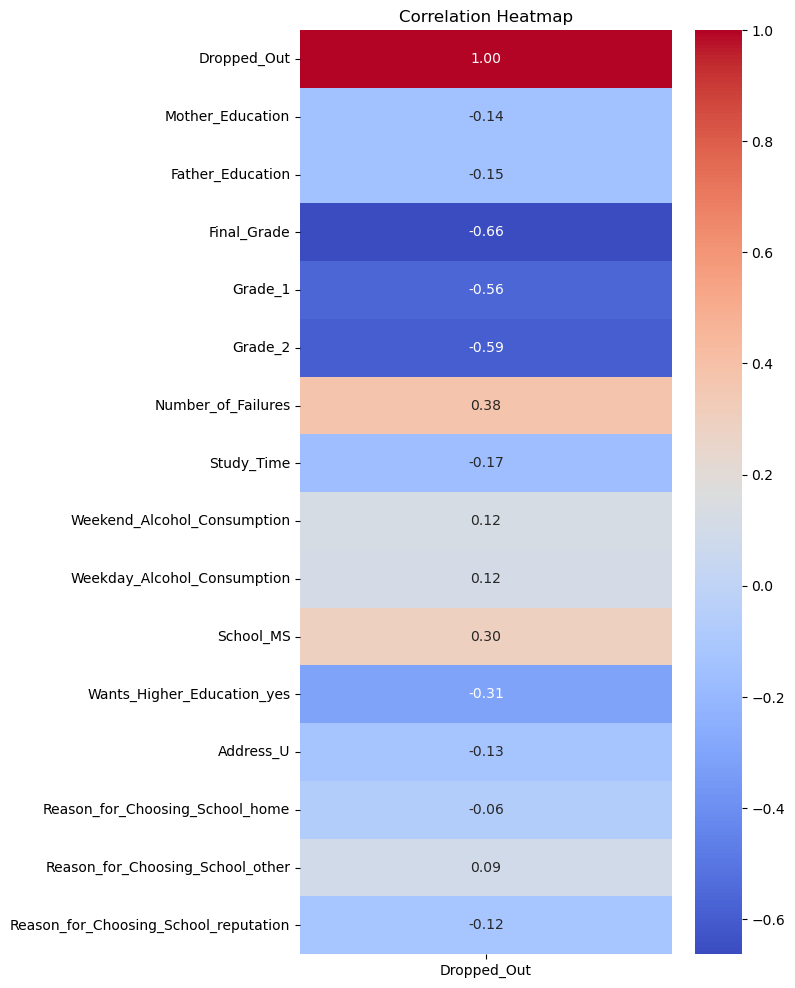

In [69]:
correlation = df_new.corr()[['Dropped_Out']]
plt.figure(figsize=(6,12))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [87]:
x = df_new.drop(columns=['Dropped_Out'])
y = df_new['Dropped_Out']

In [73]:
x.head()

,Mother_Education,Father_Education,Final_Grade,Grade_1,Grade_2,Number_of_Failures,School,Wants_Higher_Education,Study_Time,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Address,Reason_for_Choosing_School
0,4,4,11,0,11,0,GP,yes,2,1,1,U,course
1,1,1,11,9,11,0,GP,yes,2,1,1,U,course
2,1,1,12,12,13,0,GP,yes,2,2,3,U,other
3,4,2,14,14,14,0,GP,yes,3,1,1,U,home
4,3,3,13,11,13,0,GP,yes,2,1,2,U,home


In [91]:
scaler = StandardScaler()
X_scaled =scaler.fit_transform(x)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training set: (454, 15) (454,)
Validation set: (97, 15) (97,)
Testing set: (98, 15) (98,)
Training samples: 454
Validation samples: 97
Test samples: 98


In [95]:
def model():
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.005)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.005)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model
def train_model(model, X_train, y_train, X_val, y_val):
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, verbose=2, callbacks=[early_stopping])
    return history
model = model()
history = train_model(model, X_train, y_train, X_val, y_val)

NameError: name 'Sequential' is not defined